### Covid Sector Analysis 

In this notebook we further examine some of the elements of the S&P 500. More specifically, we want to find out which securities have gained the most in value and lost the most in value during the Covid period. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt

/tmp/ipykernel_24230/1247152548.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# reading in the data
sp500_volatile_df = pd.read_csv('S&P_500_volatile_predictions_index.csv')
sp500_volatile_df

,Date,Symbol,Name,GICS Sector,GICS Sub-Industry,S&P 500 Log Return,S&P 500 Log Return Cumulative,Predicted S&P 500 Log Return,Predicted S&P 500 Log Return Cumulative,Actual - Predicted,Actual - Predicted Cumulative,S&P 500 Index Log Return,S&P 500 Index Log Return Cumulative,Return Beta,Constant,R2,Return p value
0,2020-03-09,A,Agilent Technologies Inc,Health Care,Health Care Equipment,-0.104710,-0.104710,-0.092269,-0.092269,-0.012441,-0.012441,-0.079010,-0.079010,1.166084,-0.000136,0.44,3.925871e-09
1,2020-03-12,A,Agilent Technologies Inc,Health Care,Health Care Equipment,-0.082006,-0.186716,-0.116680,-0.208949,0.034674,0.022233,-0.099945,-0.178955,1.166084,-0.000136,0.44,3.925871e-09
2,2020-03-13,A,Agilent Technologies Inc,Health Care,Health Care Equipment,0.087222,-0.099494,0.103422,-0.105526,-0.016201,0.006032,0.088808,-0.090147,1.166084,-0.000136,0.44,3.925871e-09
3,2020-03-16,A,Agilent Technologies Inc,Health Care,Health Care Equipment,-0.076089,-0.175583,-0.148989,-0.254515,0.072900,0.078933,-0.127652,-0.217799,1.166084,-0.000136,0.44,3.925871e-09
4,2020-03-17,A,Agilent Technologies Inc,Health Care,Health Care Equipment,0.093849,-0.081734,0.067761,-0.186755,0.026088,0.105021,0.058226,-0.159573,1.166084,-0.000136,0.44,3.925871e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-03-18,ZTS,Zoetis,Health Care,Pharmaceuticals,-0.048241,-0.262837,-0.045116,-0.176322,-0.003125,-0.086515,-0.053222,-0.212795,0.885817,0.002029,0.27,1.448793e-05
4996,2020-03-24,ZTS,Zoetis,Health Care,Pharmaceuticals,0.113144,-0.149694,0.081472,-0.094850,0.031671,-0.054844,0.089683,-0.123112,0.885817,0.002029,0.27,1.448793e-05
4997,2020-03-26,ZTS,Zoetis,Health Care,Pharmaceuticals,0.085848,-0.063846,0.055660,-0.039190,0.030188,-0.024656,0.060544,-0.062568,0.885817,0.002029,0.27,1.448793e-05
4998,2020-04-06,ZTS,Zoetis,Health Care,Pharmaceuticals,0.100997,0.037151,0.062237,0.023047,0.038760,0.014105,0.067968,0.005400,0.885817,0.002029,0.27,1.448793e-05


In [3]:
# filtering for final cumulative sums
sp500_volatile_df = sp500_volatile_df[sp500_volatile_df['Date'] == sp500_volatile_df['Date'].max()].reset_index(drop=True)
sp500_volatile_df = sp500_volatile_df.drop(columns=['Date', 
                                                    'S&P 500 Log Return', 
                                                    'Predicted S&P 500 Log Return', 
                                                    'Actual - Predicted',
                                                    'S&P 500 Index Log Return'
                                                   ])
sp500_volatile_df

,Symbol,Name,GICS Sector,GICS Sub-Industry,S&P 500 Log Return Cumulative,Predicted S&P 500 Log Return Cumulative,Actual - Predicted Cumulative,S&P 500 Index Log Return Cumulative,Return Beta,Constant,R2,Return p value
0,A,Agilent Technologies Inc,Health Care,Health Care Equipment,0.017344,-0.065904,0.083248,-0.055352,1.166084,-0.000136,0.44,3.925871e-09
1,AAL,American Airlines Group,Industrials,Airlines,-0.246335,-0.192748,-0.053586,-0.055352,2.778079,-0.003897,0.50,8.870763e-11
2,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,-0.090070,-0.078147,-0.011923,-0.055352,0.797257,-0.003402,0.07,3.121002e-02
3,AAPL,Apple Inc-,Information Technology,"Technology Hardware, Storage & Peripherals",-0.011347,-0.096834,0.085486,-0.055352,1.874920,0.000695,0.64,2.579127e-15
4,ABBV,AbbVie Inc-,Health Care,Pharmaceuticals,-0.107085,-0.057384,-0.049701,-0.055352,0.980016,-0.000314,0.17,6.899600e-04
...,...,...,...,...,...,...,...,...,...,...,...,...
495,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,-0.035686,-0.032932,-0.002754,-0.055352,0.639868,0.000249,0.16,1.066138e-03
496,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,-0.285716,-0.061557,-0.224160,-0.055352,1.101614,-0.000058,0.34,6.312214e-07
497,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,0.002829,-0.096428,0.099257,-0.055352,1.438270,-0.001682,0.25,3.211496e-05
498,ZION,Zions Bancorp,Financials,Regional Banks,-0.113547,-0.101640,-0.011906,-0.055352,1.305325,-0.002939,0.32,1.116513e-06


In [6]:
# getting top 10 and bottom 10 abnormal returns (Actual - Predicted Cumulative)
top10_abnormal = sp500_volatile_df.nlargest(10, 'Actual - Predicted Cumulative').reset_index(drop=True)
bottom10_abnormal = sp500_volatile_df.nsmallest(10, 'Actual - Predicted Cumulative').reset_index(drop=True)

print("top 10 -> companies that gained more than predicted during covid")
# display(top10_abnormal)
top10_formatted = top10_abnormal.drop(columns = ['S&P 500 Log Return Cumulative',
                                                 'Predicted S&P 500 Log Return Cumulative',
                                                 'S&P 500 Index Log Return Cumulative',
                                                 'Return Beta',
                                                 'Constant'
                                                ])

top10_formatted = top10_formatted.rename(columns={'Return p value':'p value',
                                                  'Actual - Predicted Cumulative': 'Cumulative Abnormal Return'
                                                 })
top10_formatted['Cumulative Abnormal Return'] = top10_formatted['Cumulative Abnormal Return'].round(3)
top10_formatted['R2'] = top10_formatted['R2'].round(2)
top10_formatted['p value'] = top10_formatted['p value'].apply(lambda x: '%.2g' % x)
top10_formatted = top10_formatted.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
top10_formatted.set_properties(**{'text-align': 'center'}).hide()
display(top10_formatted)

print("\n\n\nbottom 10 -> companies that lost more than predicted during covid")
# display(bottom10_abnormal)
bottom10_formatted = bottom10_abnormal.drop(columns = ['S&P 500 Log Return Cumulative',
                                                     'Predicted S&P 500 Log Return Cumulative',
                                                     'S&P 500 Index Log Return Cumulative',
                                                     'Return Beta',
                                                     'Constant'
                                                    ])

bottom10_formatted = bottom10_formatted.rename(columns={'Return p value':'p value',
                                                  'Actual - Predicted Cumulative': 'Cumulative Abnormal Return'
                                                 })
bottom10_formatted['Cumulative Abnormal Return'] = bottom10_formatted['Cumulative Abnormal Return'].round(3)
bottom10_formatted['R2'] = bottom10_formatted['R2'].round(2)
bottom10_formatted['p value'] = bottom10_formatted['p value'].apply(lambda x: '%.2g' % x)
bottom10_formatted = bottom10_formatted.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
bottom10_formatted.set_properties(**{'text-align': 'center'}).hide()
display(bottom10_formatted)

top 10 -> companies that gained more than predicted during covid


Symbol,Name,GICS Sector,GICS Sub-Industry,Cumulative Abnormal Return,R2,p value
COG,Cabot Oil & Gas,Energy,Oil & Gas Exploration & Production,0.498000,0.140000,0.0028
IPGP,IPG Photonics Corp-,Information Technology,Electronic Manufacturing Services,0.353000,0.370000,1.4e-07
KLAC,KLA Corporation,Information Technology,Semiconductor Equipment,0.329000,0.390000,3.9e-08
PBCT,People's United Financial,Financials,Thrifts & Mortgage Finance,0.274000,0.350000,3.1e-07
WBA,Walgreens Boots Alliance,Consumer Staples,Drug Retail,0.271000,0.130000,0.0039
WEC,WEC Energy Group,Utilities,Electric Utilities,0.270000,0.010000,0.43
ABC,AmerisourceBergen Corp,Health Care,Health Care Distributors,0.265000,0.330000,7.9e-07
ORCL,Oracle Corp-,Information Technology,Application Software,0.262000,0.400000,3.3e-08
NTAP,NetApp,Information Technology,"Technology Hardware, Storage & Peripherals",0.239000,0.280000,1e-05
UPS,United Parcel Service,Industrials,Air Freight & Logistics,0.235000,0.200000,0.00022





bottom 10 -> companies that lost more than predicted during covid


Symbol,Name,GICS Sector,GICS Sub-Industry,Cumulative Abnormal Return,R2,p value
OKE,ONEOK,Energy,Oil & Gas Storage & Transportation,-1.219000,0.220000,9.3e-05
APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,-1.127000,0.050000,0.076
FANG,Diamondback Energy,Energy,Oil & Gas Exploration & Production,-0.884000,0.170000,0.00066
SPG,Simon Property Group Inc,Real Estate,Retail REITs,-0.802000,0.150000,0.0017
OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,-0.789000,0.150000,0.002
HAL,Halliburton Co-,Energy,Oil & Gas Equipment & Services,-0.763000,0.210000,0.00014
VTR,Ventas Inc,Real Estate,Health Care REITs,-0.736000,0.010000,0.57
UAL,United Airlines Holdings,Industrials,Airlines,-0.696000,0.540000,9.2e-12
MRO,Marathon Oil Corp-,Energy,Oil & Gas Exploration & Production,-0.653000,0.190000,0.00032
RCL,Royal Caribbean Group,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-0.651000,0.370000,1.2e-07


In [8]:
# selecting big tech companies
companies = ['AMZN', 'AAPL', 'MSFT', 'FB', 'GOOG', 'GOOGL']
big_tech_abnormal = sp500_volatile_df[sp500_volatile_df['Symbol'].isin(companies)].reset_index(drop=True)
# display(big_tech_abnormal)

tech_formatted = big_tech_abnormal.drop(columns = ['S&P 500 Log Return Cumulative',
                                                 'Predicted S&P 500 Log Return Cumulative',
                                                 'S&P 500 Index Log Return Cumulative',
                                                 'Return Beta',
                                                 'Constant'
                                                ])

tech_formatted = tech_formatted.rename(columns={'Return p value':'p value',
                                                  'Actual - Predicted Cumulative': 'Cumulative Abnormal Return'
                                                 })
tech_formatted['Cumulative Abnormal Return'] = tech_formatted['Cumulative Abnormal Return'].round(3)
tech_formatted['R2'] = tech_formatted['R2'].round(2)
tech_formatted['p value'] = tech_formatted['p value'].apply(lambda x: '%.2g' % x)
tech_formatted = tech_formatted.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
tech_formatted.set_properties(**{'text-align': 'center'}).hide()
display(tech_formatted)

Symbol,Name,GICS Sector,GICS Sub-Industry,Cumulative Abnormal Return,R2,p value
AAPL,Apple Inc-,Information Technology,"Technology Hardware, Storage & Peripherals",0.085000,0.640000,2.6e-15
AMZN,Amazon-com Inc-,Consumer Discretionary,Internet & Direct Marketing Retail,0.005000,0.020000,0.29
FB,"Facebook, Inc-",Communication Services,Interactive Media & Services,-0.012000,0.180000,0.00053
GOOG,Alphabet Inc- (Class C),Communication Services,Interactive Media & Services,0.032000,0.270000,1.1e-05
GOOGL,Alphabet Inc- (Class A),Communication Services,Interactive Media & Services,0.035000,0.280000,9.2e-06
MSFT,Microsoft Corp-,Information Technology,Systems Software,0.060000,0.520000,2.1e-11


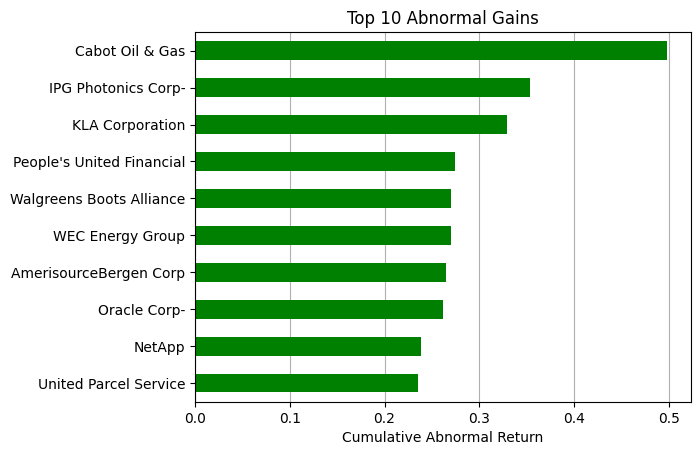

In [9]:
ax = top10_abnormal.plot.barh(title='Top 10 Abnormal Gains', 
                              x='Name', 
                              y='Actual - Predicted Cumulative', 
                              legend=False,
                              color='g'
                             )
ax.grid(axis='x')
ax.set_axisbelow(True)
plt.xlabel("Cumulative Abnormal Return")
plt.ylabel("")
plt.gca().invert_yaxis()

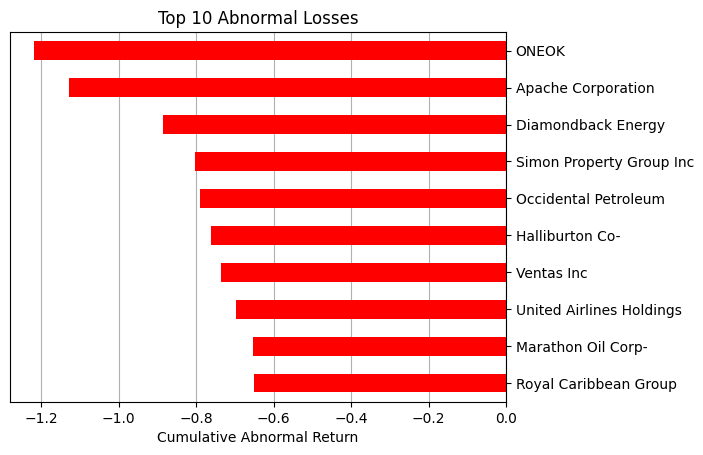

In [10]:
ax = bottom10_abnormal.plot.barh(title='Top 10 Abnormal Losses', 
                                 x='Name', 
                                 y='Actual - Predicted Cumulative', 
                                 legend=False,
                                 color='r'
                                )
ax.yaxis.tick_right()
ax.grid(axis='x')
ax.set_axisbelow(True)
plt.xlabel("Cumulative Abnormal Return")
plt.ylabel("")
plt.gca().invert_yaxis()